# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn import tree
from sklearn import ensemble
import graphviz
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Creating Dataframe

Creating the data frame via pandas.

In [2]:
df = pd.read_csv('~/downloads/credit.csv')
pd.options.display.max_columns = None

# Exploratory Data Analysis

In [3]:
# Investigate a random sample of the data
df

,checking,duration,credithistory,purpose,creditamnt,savings,employment,installment,sex,debtors,resident,age,housing,existingcredits,goodbad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,67,A152,2,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,22,A152,1,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,49,A152,1,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,45,A153,1,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,53,A153,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,31,A152,1,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,40,A152,1,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,38,A152,1,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,23,A153,1,0


In [4]:
# Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   checking         1000 non-null   object
 1   duration         1000 non-null   int64 
 2   credithistory    1000 non-null   object
 3   purpose          1000 non-null   object
 4   creditamnt       1000 non-null   int64 
 5   savings          1000 non-null   object
 6   employment       1000 non-null   object
 7   installment      1000 non-null   int64 
 8   sex              1000 non-null   object
 9   debtors          1000 non-null   object
 10  resident         1000 non-null   int64 
 11  age              1000 non-null   int64 
 12  housing          1000 non-null   object
 13  existingcredits  1000 non-null   int64 
 14  goodbad          1000 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 117.3+ KB


In [5]:
# Descriptive statistics of numerical variables
df.describe()

,duration,creditamnt,installment,resident,age,existingcredits,goodbad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [6]:
# Descriptive statistics of categorical variables
df.describe(include = object)

,checking,credithistory,purpose,savings,employment,sex,debtors,housing
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,3
top,A14,A32,A43,A61,A73,A93,A101,A152
freq,394,530,280,603,339,548,907,713


In [7]:
df.isnull().sum().sum()

0

In [8]:
df[df.duplicated()].sum().sum()

0.0

-I now have a general impression of the data. 

-I understand all of the column names and I concur with their data types.

-I have 1000 observations and 15 features. 

-Of the 15 features, 8 are categorical(object) and 7 are numeric(int64).

-There are no missing or NAN values.

-There are no duplicate entries.

-Statistics appear to be reasonable at the outset. 

-I find it interesting that the mean years of residence is only 2.85 years. 

-The spread in credit ranges from 250.00 to 18424.00 dollars.

-The "age," "duration," and "creditamnt" features appear to be right-skewed.

-The "purpose" features has the most classes at 10.

# Data Visualization

## Univariate Analysis

### Categorical Feature Analysis

The above exploratory data analysis identified potential issues with the data structures. Here the categorical features will be further investigated.

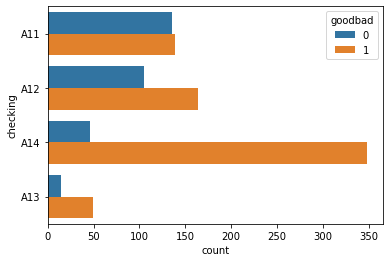

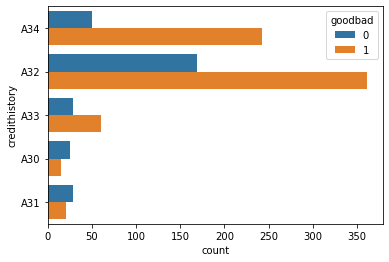

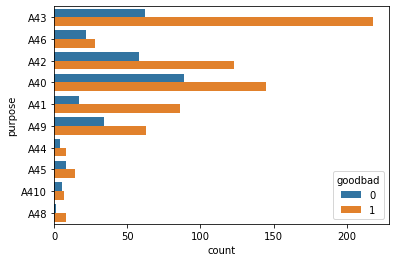

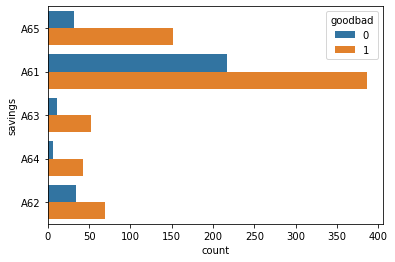

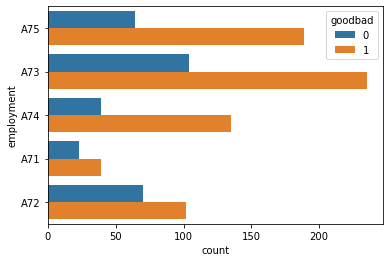

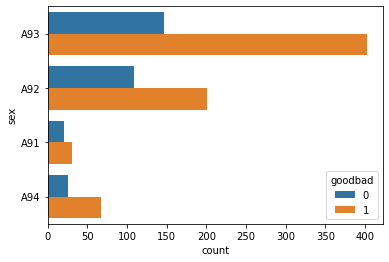

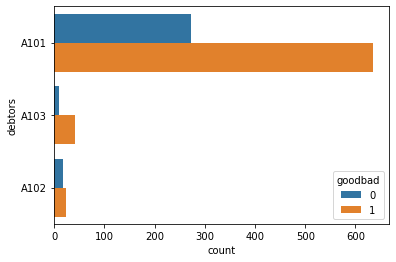

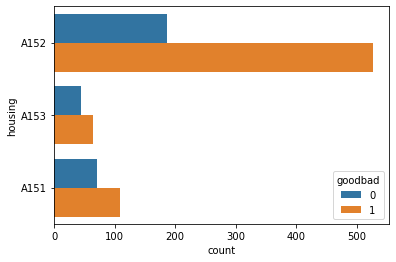

In [9]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.countplot(data=df, y=col, hue='goodbad')

-There are highly unbalanced categorical features that are strongly represented by only one class that could affect my model's performance. These features are "housing," "debtors," and possibly "savings" and "credithistory'.

-The checking feature is left-skewed.

-Credithistory, purpose, savings, employtment, sex, debtors, and employment features are right-skewed.

-Otherwise, no obvious errors in the data structures are noted.

### Numerical Feature Analysis

The above exploratory data analysis identified potential issues with the data structures. Here the numerical features will be further investigated.

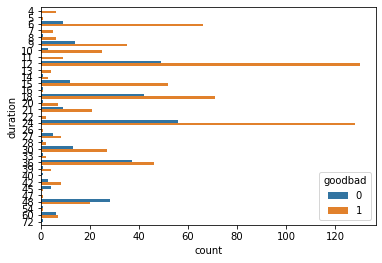

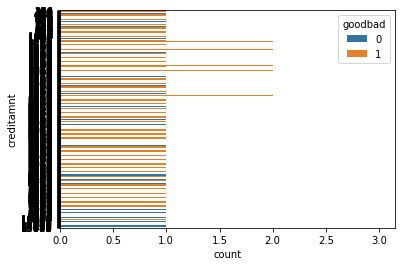

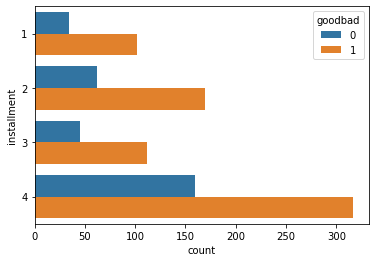

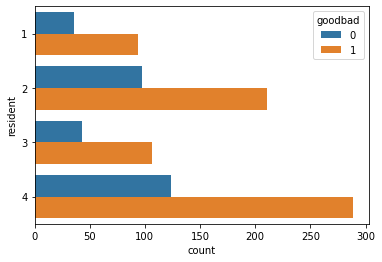

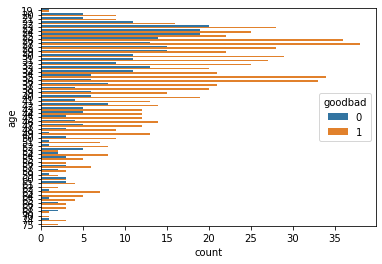

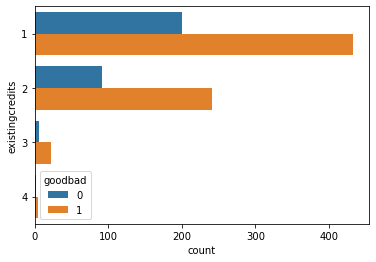

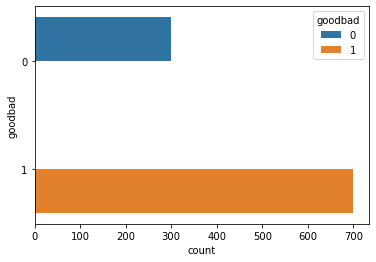

In [10]:
for col in df.select_dtypes(include='int64').columns:
    plt.figure()
    sns.countplot(data=df, y=col, hue='goodbad')

-The histograms above informed me that the installment and resident features are left-skewed. 

-Age and existing features are right skewed.

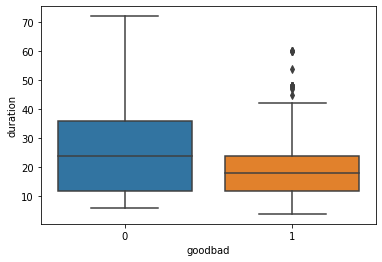

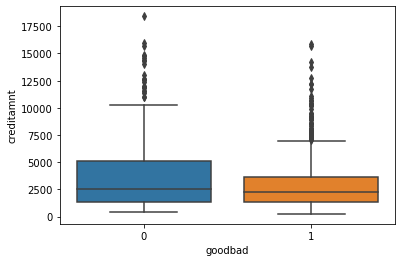

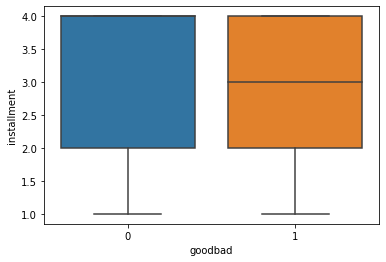

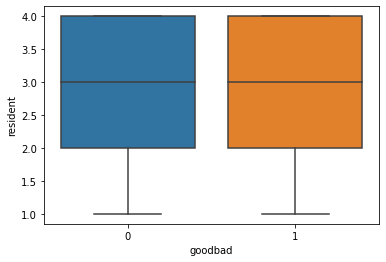

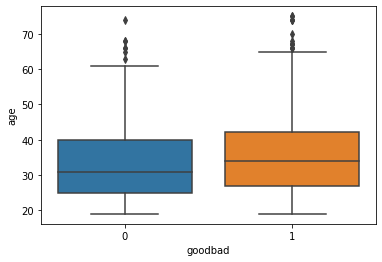

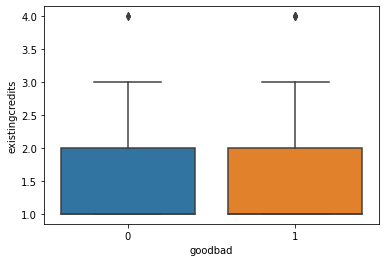

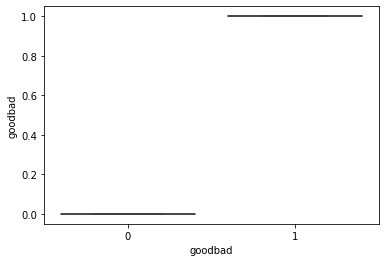

In [11]:
for col in df.select_dtypes(include='int64').columns:
    plt.figure()
    sns.boxplot(data=df, y=col, x='goodbad')

The boxplots yield that outliers exist in the good credit risk sub-category of the duration feature,  in both credit risks of the creditamt feature, both credit risks of the age feature, and both credit risks of the existingcredits feature.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

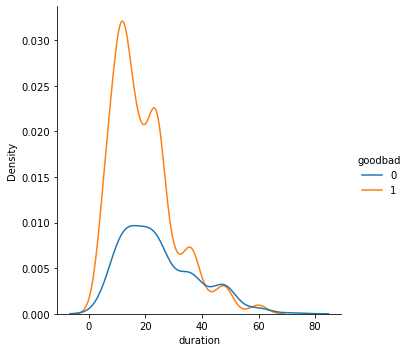

<Figure size 432x288 with 0 Axes>

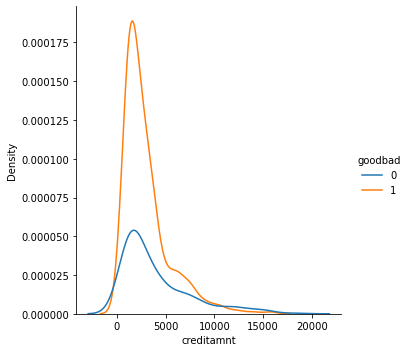

<Figure size 432x288 with 0 Axes>

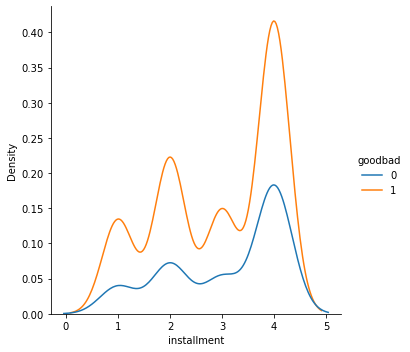

<Figure size 432x288 with 0 Axes>

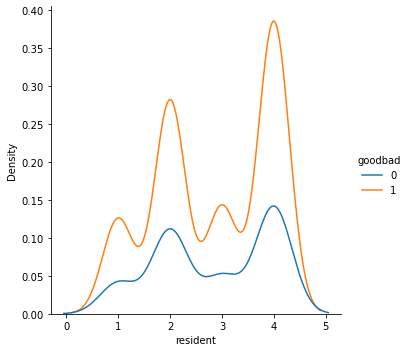

<Figure size 432x288 with 0 Axes>

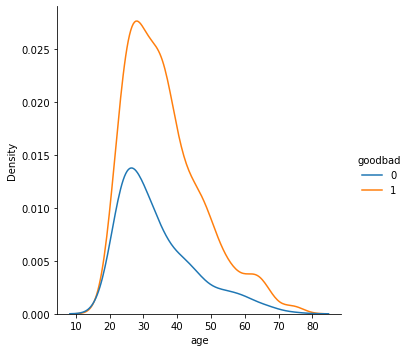

<Figure size 432x288 with 0 Axes>

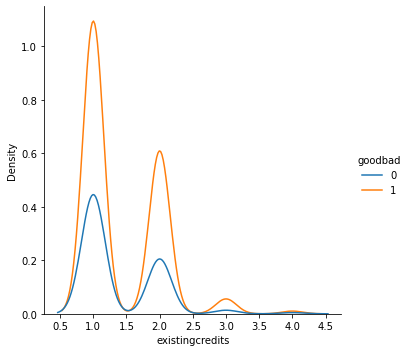

<Figure size 432x288 with 0 Axes>

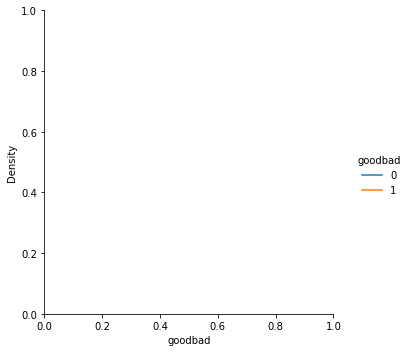

In [12]:
for col in df.select_dtypes(include='int64').columns:
    plt.figure()
    sns.displot(data=df, kind = 'kde', x=col, hue = 'goodbad')

The kernel density estimate plots above yield that the overall shapes of both good-bad credit risk distributions appear nearly identical in shape but clearly differ in magnitude. In all features the good credit risk distribution supercedes the bad credit risk distributions.

## Bivariate Analysis

### Numerical Features

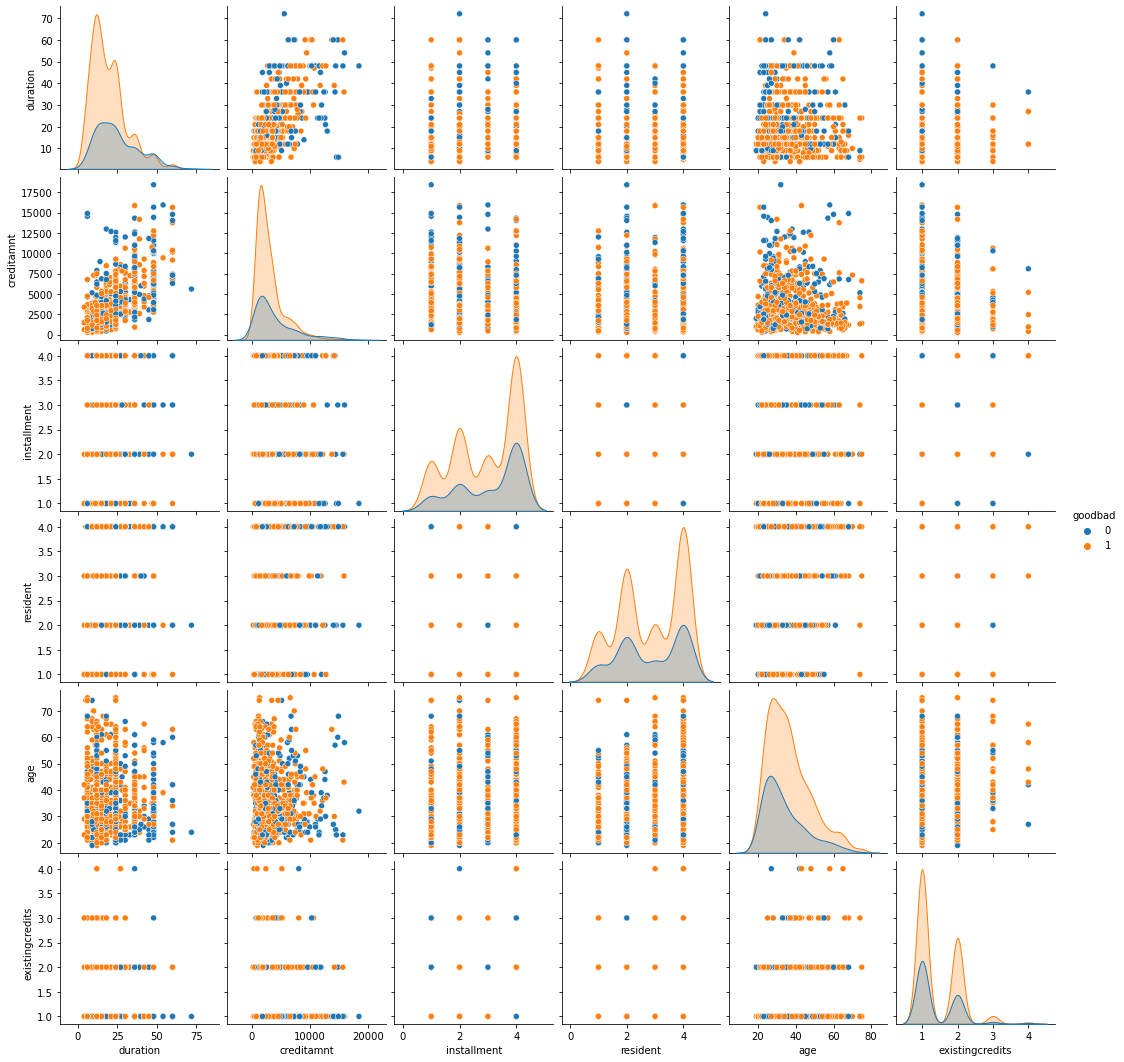

In [13]:
sns.pairplot(df, hue = "goodbad")

<AxesSubplot:>

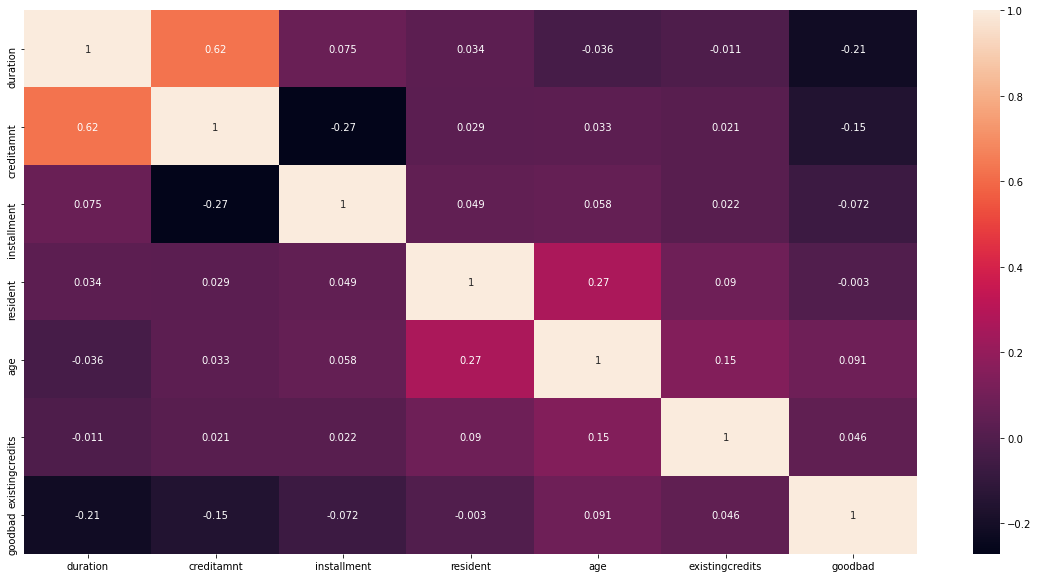

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

The above pairplots and correlation heatmap yield the following information:

-Moderate positive correlation between creditamnt and duration.

-Weak positive correlation between age and resident.

-Weak negative correlation between installment and creditamnt.

-The "strongest" correlatons the target feature had was with the duration and creditamnt features at -0.21 and -0.15, respectively.

### Categorical Features

<Figure size 432x288 with 0 Axes>

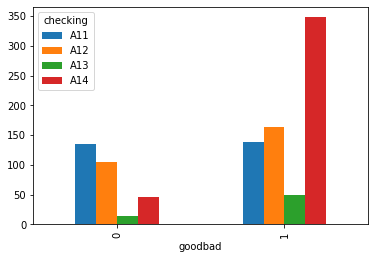

<Figure size 432x288 with 0 Axes>

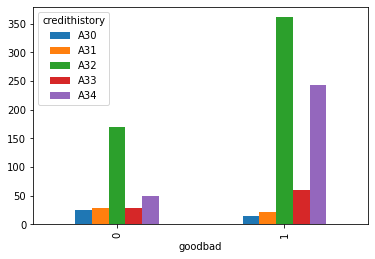

<Figure size 432x288 with 0 Axes>

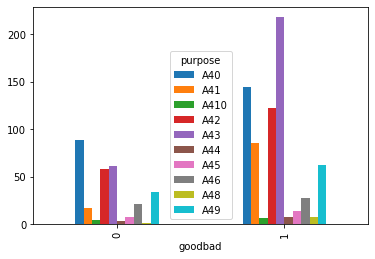

<Figure size 432x288 with 0 Axes>

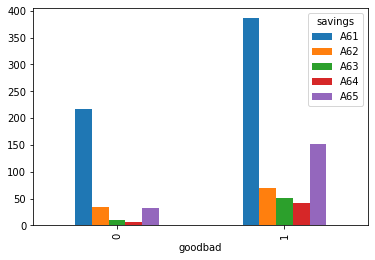

<Figure size 432x288 with 0 Axes>

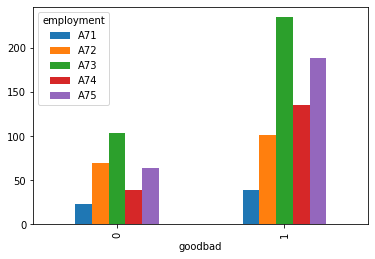

<Figure size 432x288 with 0 Axes>

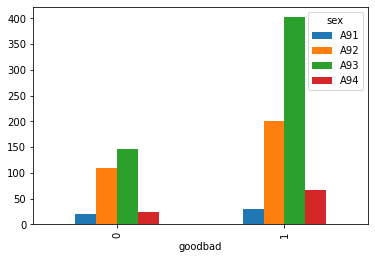

<Figure size 432x288 with 0 Axes>

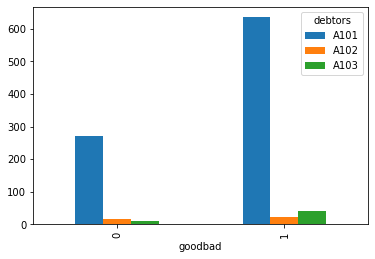

<Figure size 432x288 with 0 Axes>

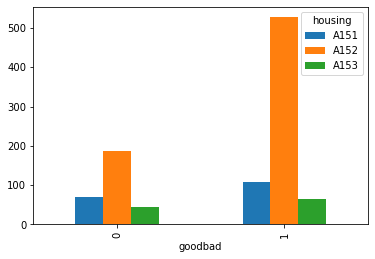

In [15]:
for col in df.select_dtypes(include = 'object').columns:
    plt.figure()
    credit_risk_checking_feature = pd.crosstab(index=df['goodbad'], columns=df[col]).plot.bar(stacked = False)
    credit_risk_checking_feature.index = ['bad', 'good']

-The checking feature level associated with the highest count in the good credit category is A14: no checking account. Both credit ratings had comparable counts of levels A11-A13.

-The credithistory feature level associated with the highest count in both credit ratings is A32: existing credits paid back duly till now and A34: critical account/other credits existing (not at this bank). Both credit ratings had comparable counts of levels A30, A31, and A33.. 

-The purpose feature levels with the 3 highest counts in both the both credit-ratings is A43: radio/television, A40: car(new), and A42:(furniture/equipment).

-The savings feature level with the highest count in both credit ratings is A61: ...< 100 DM. The good credit rating also had a significantly higher count than the bad credit rating in level A65: unknown/no savings account.

-The employment feature level associated with the highest count in both credit ratings is A73: 1 <=...<4 years and A34: critical account/other credits existing (not at this bank). Both credit ratings had comparable levels of categories A30, A31, and A33.

-The sex feature level associated with the highest count in both credit ratings is A93: male:single. What causes me pause is that there is no equivalent level for a single female. The second highest count in both credit ratings is A92: female: divorced/separated/married.

-The debtors feature category associated with the highest count in both credit ratings is A101: none.

-The housing feature category associated with the highest count in both credit ratings is A152: own.

# Review of Bivariate Analysis & Selection of Predictor Variables

- The numerical features with the strongest correlations with the target variable are the duration and creditamnt features

- The categorical features that appear to be good predictors are seemingly all of them.

# Variable Transformation of Purpose Feature

The purpose categorical feature has 10 possible levels which is double the amount of 3 other categorical features with the next highest amount of levels (5): employment, savings, and credithistory. Therefore, I will reduce the number of levels that the purpose feature has to 5 levels: car, home, education, business, and other. The car feature will include levels A40, A41. The home feature will include levels A42-A45. The education feature will include levels A46 and A48. The business feature will remain A49. The other feature will remain A410. My justification for creating these new features is to develop features that will provide more meaning in the subsequent classification models. These 5 features provide a more streamlined way to interpret the data.

<Figure size 432x288 with 0 Axes>

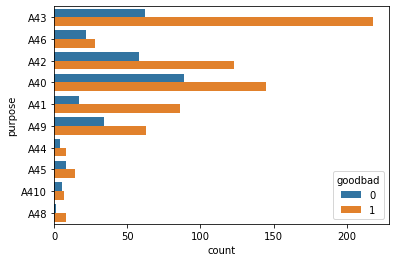

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(data=df, y='purpose', hue='goodbad')
plt.figure()

In [17]:
df = df.replace(['A40','A41'], 'car')
df = df.replace(['A42', 'A43', 'A44', 'A45'], 'home')
df = df.replace(['A46','A48'], 'education')
df.sample(10)

,checking,duration,credithistory,purpose,creditamnt,savings,employment,installment,sex,debtors,resident,age,housing,existingcredits,goodbad
379,A14,6,A34,car,362,A62,A73,4,A92,A101,4,52,A152,2,1
816,A14,6,A32,home,1338,A63,A73,1,A91,A101,4,62,A152,1,1
947,A14,12,A32,car,2859,A65,A71,4,A93,A101,4,38,A152,1,1
207,A12,12,A34,home,1424,A61,A74,4,A93,A101,3,26,A152,1,1
864,A14,10,A32,home,2210,A61,A73,2,A93,A101,2,25,A151,1,0
358,A14,12,A32,home,776,A61,A73,4,A94,A101,2,28,A152,1,1
697,A14,12,A34,car,926,A61,A71,1,A92,A101,2,38,A152,1,1
107,A12,12,A32,car,6078,A61,A74,2,A93,A101,2,32,A152,1,1
147,A14,12,A34,car,682,A62,A74,4,A92,A101,3,51,A152,2,1
410,A12,24,A32,home,1967,A61,A75,4,A92,A101,4,20,A152,1,1


<Figure size 432x288 with 0 Axes>

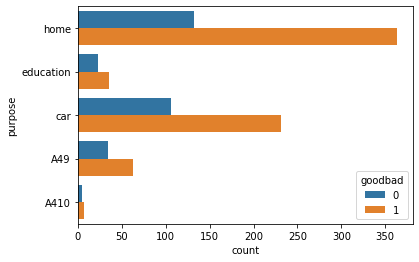

<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(data=df, y='purpose', hue='goodbad')
plt.figure()

# Preprocessing Data

## Categorical Data Dummy (One-Hot) Encoding

In [19]:
new_checking = pd.get_dummies(df['checking'], drop_first=True)
new_checking.head()

,A12,A13,A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [20]:
new_credithistory = pd.get_dummies(df['credithistory'], drop_first = True)
new_credithistory.head()

,A31,A32,A33,A34
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0


In [21]:
new_purpose = pd.get_dummies(df['purpose'], drop_first = True)
new_purpose.head()

,A49,car,education,home
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [22]:
new_savings = pd.get_dummies(df['savings'], drop_first = True)
new_savings.head()

,A62,A63,A64,A65
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [23]:
new_sex = pd.get_dummies(df['sex'], drop_first = True)
new_sex.head()

,A92,A93,A94
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [24]:
new_debtors = pd.get_dummies(df['debtors'], drop_first = True)
new_debtors.head()

,A102,A103
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [25]:
new_housing = pd.get_dummies(df['housing'], drop_first = True)
new_housing.head()

,A152,A153
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [26]:
new_employment = pd.get_dummies(df['employment'], drop_first = True)
new_employment.head()

,A72,A73,A74,A75
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


## Create New Dataframe with Dummy Indicators

In [27]:
df = pd.concat([df, new_checking, new_credithistory, new_purpose, new_savings, new_employment, new_sex, new_debtors, new_housing], axis = 1)
df.head()

,checking,duration,credithistory,purpose,creditamnt,savings,employment,installment,sex,debtors,resident,age,housing,existingcredits,goodbad,A12,A13,A14,A31,A32,A33,A34,A49,car,education,home,A62,A63,A64,A65,A72,A73,A74,A75,A92,A93,A94,A102,A103,A152,A153
0,A11,6,A34,home,1169,A65,A75,4,A93,A101,4,67,A152,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,A12,48,A32,home,5951,A61,A73,2,A92,A101,2,22,A152,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,A14,12,A34,education,2096,A61,A74,2,A93,A101,3,49,A152,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,A11,42,A32,home,7882,A61,A74,2,A93,A103,4,45,A153,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
4,A11,24,A33,car,4870,A61,A73,3,A93,A101,4,53,A153,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [28]:
df.drop(['checking','credithistory','purpose','savings','employment','sex','debtors','housing'], axis =1, inplace = True)
df.head()

,duration,creditamnt,installment,resident,age,existingcredits,goodbad,A12,A13,A14,A31,A32,A33,A34,A49,car,education,home,A62,A63,A64,A65,A72,A73,A74,A75,A92,A93,A94,A102,A103,A152,A153
0,6,1169,4,4,67,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,12,2096,2,3,49,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,42,7882,2,4,45,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
4,24,4870,3,4,53,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


## Split Training & Testing Data

In [29]:
X = df.drop('goodbad', axis = 1)
Y = df['goodbad']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state = 42)

trainX.shape, trainY.shape, testX.shape, testY.shape

((700, 32), (700,), (300, 32), (300,))

# Machine Learning Models

## Model 1 - Logistic Regression

### Optimize Regularization Value "C" To Reduce Complexity

In [30]:
logreg = LogisticRegression(C=1e10, max_iter = 1000)

### Fit Model to Training Data

In [31]:
fit = logreg.fit(trainX, trainY)
print(fit.intercept_, '\n', fit.coef_)

[0.24369663] 
 [[-2.07741859e-02 -9.79527353e-05 -3.30637319e-01 -2.04151118e-02
   3.09513377e-02 -3.38799330e-01  3.59325887e-01  4.42431586e-01
   1.66516718e+00 -5.23627713e-01  5.07595475e-02  4.17947332e-01
   1.08842825e+00 -6.87171990e-02  3.45882204e-02 -2.95197760e-01
   5.74075145e-01  2.04828708e-01  4.24858068e-01  5.35065817e-01
   7.10794760e-01 -1.74829173e-01 -9.18172633e-02  3.72283222e-01
   2.67652791e-01 -9.92823964e-02  3.85269446e-01  1.42845041e-01
  -9.29965704e-02  3.97145164e-01  3.45370985e-01 -3.00931757e-01]]


### Create Model Coefficient DataFrame in Descending Order of Correlation Strength

In [32]:
coef = pd.DataFrame(fit.coef_.T, columns=['Coefficients'], index=X.columns)
coef = coef.iloc[(-np.abs(coef['Coefficients'].values)).argsort()]
coef

,Coefficients
A14,1.665167
A34,1.088428
A65,0.710795
home,0.574075
A64,0.535066
A31,-0.523628
A13,0.442432
A63,0.424858
A33,0.417947
A103,0.397145


### Create Summary Statistics Table of Model Coeffecients

In [33]:
trainX2 = trainX
trainX2['intercept'] = 1
trainX2.head()

<ipython-input-33-4803a2e76a8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX2['intercept'] = 1


,duration,creditamnt,installment,resident,age,existingcredits,A12,A13,A14,A31,A32,A33,A34,A49,car,education,home,A62,A63,A64,A65,A72,A73,A74,A75,A92,A93,A94,A102,A103,A152,A153,intercept
541,24,2032,4,4,60,2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1
440,12,1884,4,4,39,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
482,30,3622,4,4,57,2,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
422,12,958,2,3,47,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
778,36,5711,4,2,38,2,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1


In [34]:
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.476672
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      667
Method:                           MLE   Df Model:                           32
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2181
Time:                        23:03:04   Log-Likelihood:                -333.67
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.164e-23
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0229      0.011     -2.135      0.033      -0.044      -0.002
creditamnt    

### Non-Iterative Removal of Features with P-Values >= 0.600

In [35]:
trainX2.drop(['A102','A92','A75','A73','A72', 'home', 'car', 'A49', 'A31', 'resident'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.482483
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      677
Method:                           MLE   Df Model:                           22
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2086
Time:                        23:03:04   Log-Likelihood:                -337.74
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 2.122e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0213      0.010     -2.047      0.041      -0.042      -0.001
creditamnt    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Iterative Removal of Features with P-Values > 0.05

In [36]:
trainX2.drop(['A62'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.482669
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      678
Method:                           MLE   Df Model:                           21
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2083
Time:                        23:03:04   Log-Likelihood:                -337.87
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 8.042e-27
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0210      0.010     -2.020      0.043      -0.041      -0.001
creditamnt    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
trainX2.drop(['A153'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.483148
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      679
Method:                           MLE   Df Model:                           20
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2075
Time:                        23:03:04   Log-Likelihood:                -338.20
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 3.580e-27
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0219      0.010     -2.128      0.033      -0.042      -0.002
creditamnt    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
trainX2.drop(['A94'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.483633
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                           19
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2067
Time:                        23:03:04   Log-Likelihood:                -338.54
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.564e-27
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0221      0.010     -2.149      0.032      -0.042      -0.002
creditamnt    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
trainX2.drop(['A74'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.484594
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      681
Method:                           MLE   Df Model:                           18
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2051
Time:                        23:03:04   Log-Likelihood:                -339.22
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 9.028e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0209      0.010     -2.041      0.041      -0.041      -0.001
creditamnt    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
trainX2.drop(['A12'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.486122
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      682
Method:                           MLE   Df Model:                           17
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2026
Time:                        23:03:04   Log-Likelihood:                -340.29
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 7.333e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0212      0.010     -2.065      0.039      -0.041      -0.001
creditamnt    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
trainX2.drop(['education'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Optimization terminated successfully.
         Current function value: 0.487708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      683
Method:                           MLE   Df Model:                           16
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2000
Time:                        23:03:04   Log-Likelihood:                -341.40
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 6.056e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0209      0.010     -2.035      0.042      -0.041      -0.001
creditamnt    

In [42]:
trainX2.drop(['A63'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.489700
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      684
Method:                           MLE   Df Model:                           15
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1968
Time:                        23:03:04   Log-Likelihood:                -342.79
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 6.365e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
duration           -0.0207      0.010     -2.020      0.043      -0.041      -0.001
creditamnt    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
trainX2.drop(['existingcredits'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Optimization terminated successfully.
         Current function value: 0.491798
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      685
Method:                           MLE   Df Model:                           14
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1933
Time:                        23:03:04   Log-Likelihood:                -344.26
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 7.015e-28
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
duration       -0.0198      0.010     -1.951      0.051      -0.040     8.6e-05
creditamnt     -0.0001   4

In [44]:
trainX2.drop(['A93'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Optimization terminated successfully.
         Current function value: 0.494366
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                           13
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1891
Time:                        23:03:04   Log-Likelihood:                -346.06
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.028e-27
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
duration       -0.0196      0.010     -1.948      0.051      -0.039       0.000
creditamnt  -8.726e-05   4

In [45]:
trainX2.drop(['A64'], axis =1, inplace = True)
logit_model=sm.Logit(trainY,trainX2)
result=logit_model.fit()
print(result.summary())

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Optimization terminated successfully.
         Current function value: 0.497240
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                           12
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1844
Time:                        23:03:05   Log-Likelihood:                -348.07
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.800e-27
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
duration       -0.0198      0.010     -1.961      0.050      -0.039   -1.48e-05
creditamnt  -8.805e-05   4

### Review of Feature Selection for Final Logistic Regression Model
The following features have been found to have a significant P values of 0.05 or less and will be included in the final model:
- Duration
- Creditamnt
- Installment
- Age
- A13 : ... >= 200 DM  
- A14 : no checking account 
- A32 : existing credits paid back duly till now 
- A33 : delay in paying off in the past 
- A34 : critical account/other credits existing (not at this bank)
- A65 : unknown/ no savings account
- A103 : guarantor
- A152 : own 

In [46]:
trainX2.drop('intercept', axis = 1, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Fit Final Regression Model to Training Dataset
The accuracy score translates well to the test dataset. The accuracy decreased by only 3.14%.

In [47]:
testX.drop(['A102','A92','A75','A73','A72', 'home', 'car', 'A49', 'A31', 'resident', 'A153', 'A94', 'A62', 'A74', 'education', 'A12', 'A63', 'existingcredits', 'A93', 'A64'], axis =1, inplace = True)
testX

,duration,creditamnt,installment,age,A13,A14,A32,A33,A34,A65,A103,A152
521,18,3190,2,24,0,0,1,0,0,0,0,1
737,18,4380,3,35,0,0,1,0,0,0,0,1
740,24,2325,2,32,0,0,0,0,0,0,0,1
660,12,1297,3,23,1,0,1,0,0,0,0,0
411,33,7253,3,35,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
468,33,2764,2,26,0,1,0,1,0,0,0,1
935,30,1919,4,30,0,0,0,1,0,0,0,1
428,9,1313,1,20,0,1,1,0,0,0,0,1
7,36,6948,2,35,0,0,1,0,0,0,0,0


In [48]:
fit = logreg.fit(trainX2, trainY)
fit.score(trainX2, trainY)

0.7414285714285714

### Fit Final Regression Model to Test Dataset

In [49]:
fit.score(testX, testY)

0.71

The left column represents the probability that someone is a bad credit risk. The right column represents the probability that someone is a good credit risk.

In [50]:
fit.predict_proba(trainX2)

array([[0.14383304, 0.85616696],
       [0.12417215, 0.87582785],
       [0.55690651, 0.44309349],
       ...,
       [0.12510524, 0.87489476],
       [0.26255456, 0.73744544],
       [0.09532958, 0.90467042]])

This creates an array of the right column that predicts good credit risk

In [51]:
prob_of_1 = fit.predict_proba(trainX2)[:,1]
prob_of_1

array([0.85616696, 0.87582785, 0.44309349, 0.89760304, 0.88011167,
       0.85623589, 0.32924118, 0.6424939 , 0.53849384, 0.94465042,
       0.70500646, 0.51121376, 0.90624388, 0.37018973, 0.84976801,
       0.82169728, 0.83117857, 0.96772934, 0.34012443, 0.69301436,
       0.49930114, 0.66463894, 0.84140113, 0.8753159 , 0.50718341,
       0.85920727, 0.46563376, 0.77254536, 0.50210306, 0.78451638,
       0.61012738, 0.73651511, 0.55060777, 0.97270438, 0.94038382,
       0.76393486, 0.31571777, 0.85311191, 0.70625746, 0.8279727 ,
       0.44193622, 0.75133052, 0.655564  , 0.76468719, 0.95641254,
       0.72603691, 0.50305195, 0.83187293, 0.96770791, 0.96059946,
       0.57634618, 0.46856047, 0.82220809, 0.80379256, 0.28034359,
       0.41128024, 0.96245418, 0.75936654, 0.94647641, 0.89915179,
       0.87285063, 0.81318026, 0.96262678, 0.84883609, 0.80908901,
       0.69277218, 0.94822685, 0.81677342, 0.81140105, 0.87683666,
       0.72439146, 0.80587883, 0.7320895 , 0.65158994, 0.90186

The model is using the default cutoff value of 0.5 to determine if someone is a bad(0) or good(1) credit risk. 

In [52]:
predicted_group = fit.predict(trainX2)
predicted_group

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

### Training Data Confusion Matrix
The confusion matrix generated below indicates that 79 individuals are correctly predicted to be a bad credit risk, 130 individuals have been incorrectly predicted to be a good credit risk (Type I Error), 51 individuals have been incorrectly predicted to be a bad credit risk (Type II Error), and 440 individuals have been correctly predicted to be a good credit risk.

In [53]:
confusion_matrix(trainY, predicted_group)

array([[ 79, 130],
       [ 51, 440]])

### Testing Data Confusion Matrix
The confusion matrix generated below indicates that 28 individuals are correctly predicted to be a bad credit risk, 63 individuals have been incorrectly predicted to be a good credit risk (Type I Error), 24 individuals have been incorrectly predicted to be a bad credit risk (Type II Error), and 185 individuals have been correctly predicted to be a good credit risk.

In [54]:
pred_group_test = fit.predict(testX)
confusion_matrix(testY, pred_group_test)

array([[ 28,  63],
       [ 24, 185]])

### Logistic Regression Classification Report

In [55]:
grid_predictions = fit.predict(testX)
 
# print classification report
print(classification_report(testY, grid_predictions))

              precision    recall  f1-score   support

           0       0.54      0.31      0.39        91
           1       0.75      0.89      0.81       209

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.68      0.71      0.68       300



### Cutoff Optimization of Logistic Regression Model
The optimal cutoff point for the logistic regression model is noted to be at 0.43, 0.44, and 0.47. These 3 threshold values produce the highest noted accuracy rate of 75.71%

In [56]:
threshold_value = np.arange(0, 1.01, 0.01)
print(threshold_value)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [57]:
len(trainY)

700

In [58]:
a=0
for prob in prob_of_1:
    if a<101:
        threshold=threshold_value[a]
        predict_group = prob_of_1 > threshold
        b=np.sum(trainY==predict_group)/700
        print("Threshold value is:", threshold, "and accuracy rate is", b)
        a+=1

Threshold value is: 0.0 and accuracy rate is 0.7014285714285714
Threshold value is: 0.01 and accuracy rate is 0.7014285714285714
Threshold value is: 0.02 and accuracy rate is 0.7014285714285714
Threshold value is: 0.03 and accuracy rate is 0.7014285714285714
Threshold value is: 0.04 and accuracy rate is 0.7014285714285714
Threshold value is: 0.05 and accuracy rate is 0.7014285714285714
Threshold value is: 0.06 and accuracy rate is 0.7014285714285714
Threshold value is: 0.07 and accuracy rate is 0.7014285714285714
Threshold value is: 0.08 and accuracy rate is 0.7014285714285714
Threshold value is: 0.09 and accuracy rate is 0.7014285714285714
Threshold value is: 0.1 and accuracy rate is 0.7014285714285714
Threshold value is: 0.11 and accuracy rate is 0.7014285714285714
Threshold value is: 0.12 and accuracy rate is 0.7014285714285714
Threshold value is: 0.13 and accuracy rate is 0.7014285714285714
Threshold value is: 0.14 and accuracy rate is 0.7014285714285714
Threshold value is: 0.15 an

## Model 2 - Decision Tree
The unpruned decision tree below has overfitted the training data as evidenced by signficant drop in accuracy of 34.0%

In [59]:
tree1 = tree.DecisionTreeClassifier()

tree1 = tree1.fit(trainX2, trainY)

print('Training data accuracy:', tree1.score(trainX2, trainY))

print('Testing data accuracy:', tree1.score(testX, testY))

Training data accuracy: 1.0
Testing data accuracy: 0.68


### Unpruned Tree Model Visualization

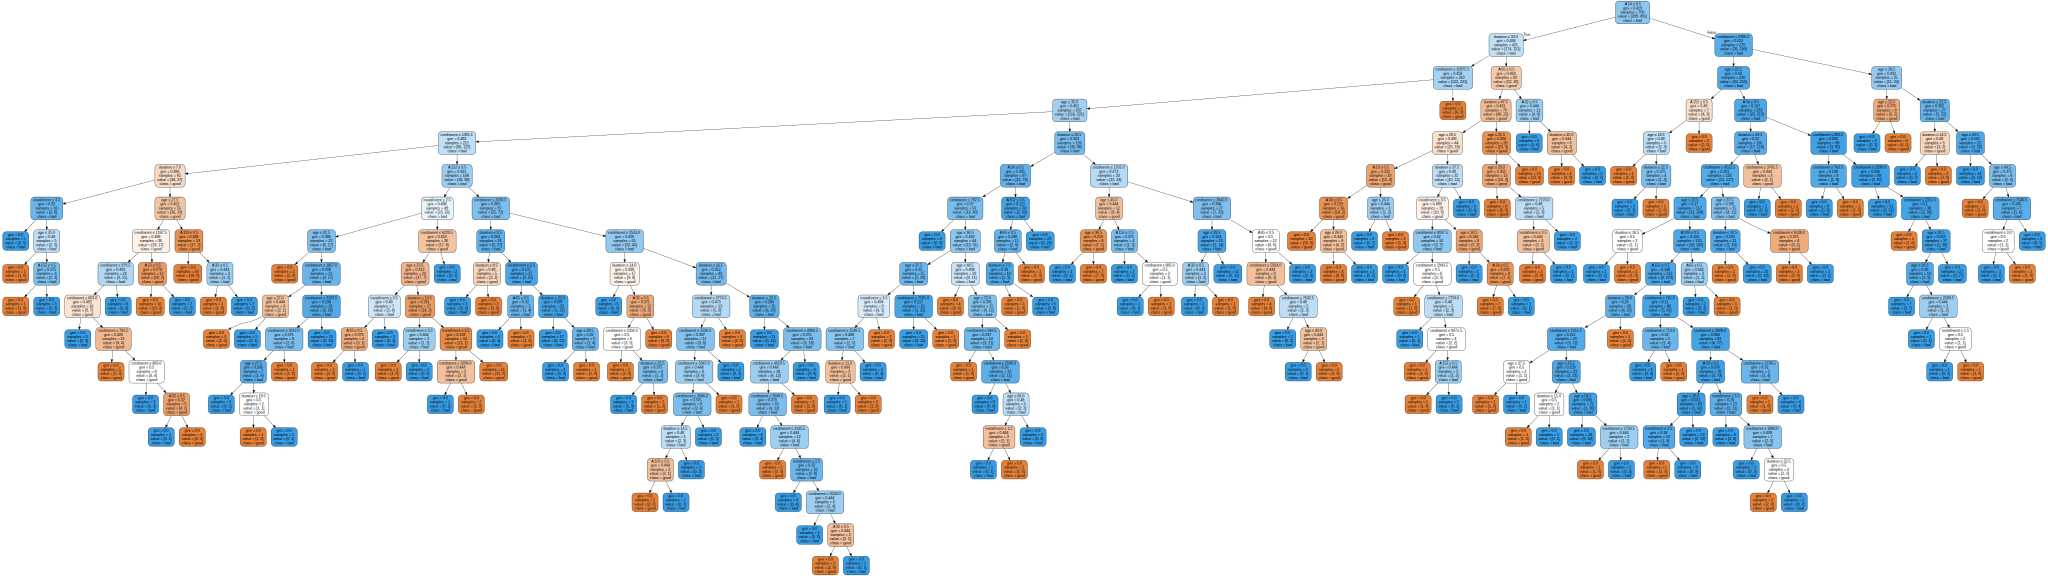

In [60]:
tree_graph = tree.export_graphviz(tree1, out_file=None, 
            feature_names=['duration', 'creditamnt', 'installment', 'age', 'A13', 'A14', 'A32', 'A33', 'A34', 'A65', 'A103', 'A152'],
            class_names = ['good', 'bad'],                    
            filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(tree_graph)
graph.render("Unpruned Decision Tree", format="png")
graph

### Decision Tree Pruning
I will iteratively adjust the max_depth and min_samples_leaf hyperparameters of the decision tree classifier until I find a peak in testing data accuracy.

In [61]:
tree2 = tree.DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1)

tree2 = tree2.fit(trainX2, trainY)

print('Training data accuracy:', tree2.score(trainX2, trainY))

print('Testing data accuracy:', tree2.score(testX, testY))

Training data accuracy: 0.7328571428571429
Testing data accuracy: 0.71


In [62]:
tree3 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1)

tree3 = tree3.fit(trainX2, trainY)

print('Training data accuracy:', tree3.score(trainX2, trainY))

print('Testing data accuracy:', tree3.score(testX, testY))

Training data accuracy: 0.7542857142857143
Testing data accuracy: 0.71


In [63]:
tree4 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10)

tree4 = tree4.fit(trainX2, trainY)

print('Training data accuracy:', tree4.score(trainX2, trainY))

print('Testing data accuracy:', tree4.score(testX, testY))

Training data accuracy: 0.7528571428571429
Testing data accuracy: 0.7233333333333334


In [64]:
tree5 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 25)

tree5 = tree5.fit(trainX2, trainY)

print('Training data accuracy:', tree5.score(trainX2, trainY))

print('Testing data accuracy:', tree5.score(testX, testY))

Training data accuracy: 0.7328571428571429
Testing data accuracy: 0.71


In [65]:
tree6 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1)

tree6 = tree6.fit(trainX2, trainY)

print('Training data accuracy:', tree6.score(trainX2, trainY))

print('Testing data accuracy:', tree6.score(testX, testY))

Training data accuracy: 0.7628571428571429
Testing data accuracy: 0.7166666666666667


In [66]:
tree7 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10)

tree7 = tree7.fit(trainX2, trainY)

print('Training data accuracy:', tree7.score(trainX2, trainY))

print('Testing data accuracy:', tree7.score(testX, testY))

Training data accuracy: 0.7528571428571429
Testing data accuracy: 0.7233333333333334


In [67]:
tree8 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 25)

tree8 = tree8.fit(trainX2, trainY)

print('Training data accuracy:', tree8.score(trainX2, trainY))

print('Testing data accuracy:', tree8.score(testX, testY))

Training data accuracy: 0.7457142857142857
Testing data accuracy: 0.69


In [68]:
tree9 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1)

tree9 = tree9.fit(trainX2, trainY)

print('Training data accuracy:', tree9.score(trainX2, trainY))

print('Testing data accuracy:', tree9.score(testX, testY))

Training data accuracy: 0.7942857142857143
Testing data accuracy: 0.7133333333333334


In [69]:
tree10 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10)

tree10 = tree10.fit(trainX2, trainY)

print('Training data accuracy:', tree10.score(trainX2, trainY))

print('Testing data accuracy:', tree10.score(testX, testY))

Training data accuracy: 0.7728571428571429
Testing data accuracy: 0.7133333333333334


In [70]:
tree11 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 25)

tree11 = tree11.fit(trainX2, trainY)

print('Training data accuracy:', tree11.score(trainX2, trainY))

print('Testing data accuracy:', tree11.score(testX, testY))

Training data accuracy: 0.7542857142857143
Testing data accuracy: 0.71


In [71]:
tree12 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 1)

tree12 = tree12.fit(trainX2, trainY)

print('Training data accuracy:', tree12.score(trainX2, trainY))

print('Testing data accuracy:', tree12.score(testX, testY))

Training data accuracy: 0.8185714285714286
Testing data accuracy: 0.7


In [72]:
tree13 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 10)

tree13 = tree13.fit(trainX2, trainY)

print('Training data accuracy:', tree13.score(trainX2, trainY))

print('Testing data accuracy:', tree13.score(testX, testY))

Training data accuracy: 0.7857142857142857
Testing data accuracy: 0.7366666666666667


In [73]:
tree14 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 25)

tree14 = tree14.fit(trainX2, trainY)

print('Training data accuracy:', tree14.score(trainX2, trainY))

print('Testing data accuracy:', tree14.score(testX, testY))

Training data accuracy: 0.7542857142857143
Testing data accuracy: 0.71


In [74]:
tree15 = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 1)

tree15 = tree15.fit(trainX2, trainY)

print('Training data accuracy:', tree15.score(trainX2, trainY))

print('Testing data accuracy:', tree15.score(testX, testY))

Training data accuracy: 0.8457142857142858
Testing data accuracy: 0.7033333333333334


In [75]:
tree16 = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10)

tree16 = tree16.fit(trainX2, trainY)

print('Training data accuracy:', tree16.score(trainX2, trainY))

print('Testing data accuracy:', tree16.score(testX, testY))

Training data accuracy: 0.7971428571428572
Testing data accuracy: 0.7266666666666667


In [76]:
tree17 = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 25)

tree17 = tree17.fit(trainX2, trainY)

print('Training data accuracy:', tree17.score(trainX2, trainY))

print('Testing data accuracy:', tree17.score(testX, testY))

Training data accuracy: 0.76
Testing data accuracy: 0.7233333333333334


### Optimally Pruned Tree Visualization
- Desicion Tree Classifier 13 with hyperparameters of max_depth = 6 and min_samples_leaf = 10 yielded the highest testing data accuracy of 73.67%.
- Three different leaf nodes at 2 different depths of 5 and 6 in the decision tree produced a Gini index = 0.
- 2 of these leaf nodes are on the false side of the initial decision rule and one is on the true side of the intitial decison rule:
- On the true side, the leaf node with a Gini index of 0 is located on the 5th level, 13 samples, value = [13,0], and class = good.
- On the false side, one of the leaf nodes with a Gini index of 0 is located on the 5th level, 36 samples, value = [0,36], and class = bad.
- On the false side, one of the leaf nodes with a Gini index of 0 is located on the 6th level, 27 samples, value = [0,27], and class = bad.
- The leaf node with a Gini index = 0 and 36 samples qualifies as the decision rule with the best classification due to having the highest sample size; otherwise, all 3 have equivalent classification rates.

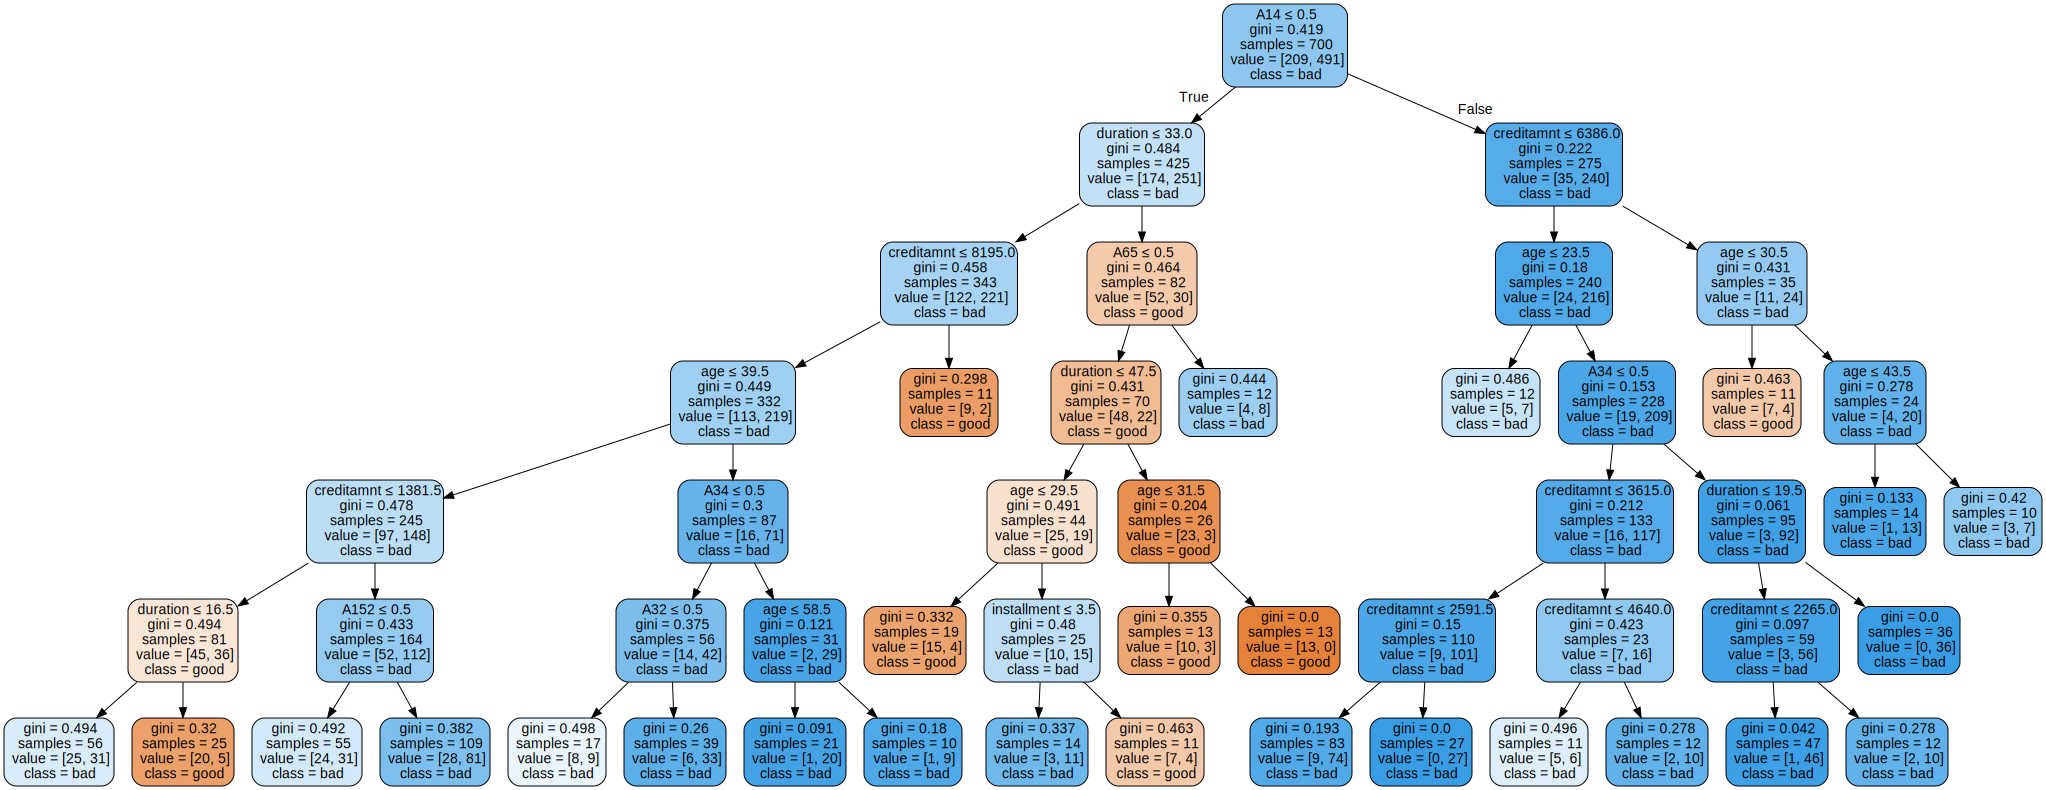

In [77]:
tree_graph = tree.export_graphviz(tree13, out_file=None, 
            feature_names=['duration', 'creditamnt', 'installment', 'age', 'A13', 'A14', 'A32', 'A33', 'A34', 'A65', 'A103', 'A152'],
            class_names = ['good', 'bad'],                    
            filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(tree_graph)
graph.render("Pruned Decision Tree", format="png")
graph

### Pruned Decision Tree Classification Report

In [78]:
tree13 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 10)
tree13 = tree13.fit(trainX2, trainY)
prediction_tree = tree13.predict(testX)
print(classification_report(testY, prediction_tree))

              precision    recall  f1-score   support

           0       0.69      0.24      0.36        91
           1       0.74      0.95      0.83       209

    accuracy                           0.74       300
   macro avg       0.72      0.60      0.60       300
weighted avg       0.73      0.74      0.69       300



### Decision Tree Hyperparameter Optimization Using Grid Search

In [79]:
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random']}
 
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(trainX2, trainY)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, sp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

[CV 3/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=2, min_samples_leaf=8, splitter=best; total tim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

[CV 5/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, min_samples_leaf=5, splitter=random; total tim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

[CV 2/5] END criterion=log_loss, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, splitter=random; total tim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

[CV 1/5] END criterion=log_loss, max_depth=4, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=4, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=4, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=4, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=4, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, splitter=best; tota

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, min_samples_leaf=9, splitter=best; total tim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

[CV 5/5] END criterion=log_loss, max_depth=6, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=6, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=6, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=6, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=6, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=6, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=6, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=6, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=6, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=6, min_samples_leaf=7, splitter=best; total tim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

[CV 4/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, min_samples_leaf=5, splitter=best; total tim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

### GridSearch Decision Tree Classification Report

In [80]:
print(grid.best_estimator_)

grid_predictions = grid.predict(testX)

print(classification_report(testY, grid_predictions))

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       splitter='random')
              precision    recall  f1-score   support

           0       0.59      0.29      0.39        91
           1       0.75      0.91      0.82       209

    accuracy                           0.72       300
   macro avg       0.67      0.60      0.60       300
weighted avg       0.70      0.72      0.69       300



## Model 3 - Support Vector Machine
### Data Standardization

In [81]:
scaler = StandardScaler()
scaler.fit(trainX2)
scaler.fit(testX)
trainX2 = scaler.transform(trainX2)
testX = scaler.transform(testX)
trainX2, testX

(array([[ 0.31603792, -0.38287303,  0.93573471, ..., -0.46852129,
         -0.20412415, -1.53973586],
        [-0.65307324, -0.44426834,  0.93573471, ..., -0.46852129,
         -0.20412415,  0.64946204],
        [ 0.8005935 ,  0.2767117 ,  0.93573471, ..., -0.46852129,
         -0.20412415, -1.53973586],
        ...,
        [ 0.31603792,  1.18187766,  0.93573471, ..., -0.46852129,
         -0.20412415,  0.64946204],
        [-0.65307324, -0.61020161, -0.8522934 , ...,  2.13437475,
         -0.20412415,  0.64946204],
        [-1.13762882, -0.83918952,  0.04172066, ..., -0.46852129,
         -0.20412415,  0.64946204]]),
 array([[-0.16851766,  0.09750377, -0.8522934 , ..., -0.46852129,
         -0.20412415,  0.64946204],
        [-0.16851766,  0.59115524,  0.04172066, ..., -0.46852129,
         -0.20412415,  0.64946204],
        [ 0.31603792, -0.26132692, -0.8522934 , ..., -0.46852129,
         -0.20412415,  0.64946204],
        ...,
        [-0.89535103, -0.68113808, -1.74630745, ..., -

### Linear Support Vector Machine: Training, Predicting, & Scoring

In [82]:
#Training
lvsm =svm.SVC(kernel = 'linear')
lvsm.fit(trainX2, trainY)
#Predicting
lvsm.predict(trainX2)
lvsm.predict(testX)
#Scoring
print('Training data accuracy:', lvsm.score(trainX2, trainY))
print('Testing data accuracy:', lvsm.score(testX, testY))

Training data accuracy: 0.7585714285714286
Testing data accuracy: 0.7433333333333333


### Optimization of Support Vector Machine Regularization Hyperparameters with Linear Kernel

In [83]:
param_grid_lin = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],'kernel': ['linear']}
 
grid_lin = GridSearchCV(SVC(), param_grid_lin, refit = True, verbose = 3)

grid_lin.fit(trainX2, trainY)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 2/5] END .............................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'kernel': ['linear']},
             verbose=3)

### Optimal Parameters & Classification Report

In [84]:
print(grid_lin.best_estimator_)

grid_predictions1 = grid_lin.predict(testX)
 
# print classification report
print(classification_report(testY, grid_predictions1))

SVC(C=0.1, kernel='linear')
              precision    recall  f1-score   support

           0       0.74      0.27      0.40        91
           1       0.75      0.96      0.84       209

    accuracy                           0.75       300
   macro avg       0.74      0.62      0.62       300
weighted avg       0.75      0.75      0.71       300



### Optimization of Support Vector Machine Hyperparameters with Radial Basis Function Kernel

In [85]:
param_grid_rbf = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, refit = True, verbose = 3)

grid_rbf.fit(trainX2, trainY)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

### Optimal Parameters & Classification Report

In [86]:
print(grid_rbf.best_estimator_)

grid_predictions2 = grid_rbf.predict(testX)
 
# print classification report
print(classification_report(testY, grid_predictions2))

SVC(C=1, gamma=0.1)
              precision    recall  f1-score   support

           0       0.64      0.31      0.41        91
           1       0.75      0.92      0.83       209

    accuracy                           0.74       300
   macro avg       0.70      0.62      0.62       300
weighted avg       0.72      0.74      0.70       300



### Optimization of Support Vector Machine Hyperparameters with Polynomial Kernel

In [87]:
param_grid_poly = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'degree': [1, 2, 3, 4, 5],
              'kernel': ['poly']}
 
grid_poly = GridSearchCV(SVC(), param_grid_poly, refit = True, verbose = 3)

# fitting the model for grid search
grid_poly.fit(trainX2, trainY)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..................C=0.01, degree=1, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=0.01, degree=1, kernel=poly; total time=   0.0s
[CV 3/5] END ..................C=0.01, degree=1, kernel=poly; total time=   0.0s
[CV 4/5] END ..................C=0.01, degree=1, kernel=poly; total time=   0.0s
[CV 5/5] END ..................C=0.01, degree=1, kernel=poly; total time=   0.0s
[CV 1/5] END ..................C=0.01, degree=2, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=0.01, degree=2, kernel=poly; total time=   0.0s
[CV 3/5] END ..................C=0.01, degree=2, kernel=poly; total time=   0.0s
[CV 4/5] END ..................C=0.01, degree=2, kernel=poly; total time=   0.0s
[CV 5/5] END ..................C=0.01, degree=2, kernel=poly; total time=   0.0s
[CV 1/5] END ..................C=0.01, degree=3, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=0.01, degree=3

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'kernel': ['poly']},
             verbose=3)

### Optimal Parameters & Classification Report

In [88]:
print(grid_poly.best_estimator_)

grid_predictions3 = grid_poly.predict(testX)
 
# print classification report
print(classification_report(testY, grid_predictions3))

SVC(C=1, degree=2, kernel='poly')
              precision    recall  f1-score   support

           0       0.71      0.16      0.27        91
           1       0.73      0.97      0.83       209

    accuracy                           0.73       300
   macro avg       0.72      0.57      0.55       300
weighted avg       0.72      0.73      0.66       300



## Results Summary

### Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.54      0.31      0.39        91
           1       0.75      0.89      0.81       209

    accuracy                           0.71       300

The logistic regression model yielded the lowest yet comparable accuracy score of 71% and has tied with others as the lowest performing predictive model. However, this is at a cut-off of 0.5. The optimal cutoff point for the logistic regression model is noted to be at 0.43, 0.44, and 0.47. These 3 threshold values produce the highest noted accuracy rate of 75.71%.

### Pruned Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.69      0.24      0.36        91
           1       0.74      0.95      0.83       209

    accuracy                           0.74       300

The pruned decision tree model yielded the second highest accuracy score of 74% and produced a very clear intuitive diagram of the decision rules and leaf nodes.

### GridSearch Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.62      0.11      0.19        91
           1       0.71      0.97      0.82       209

    accuracy                           0.71       300

Surprisingly, the GridSearch Decision Tree yielded the lowest accuracy score of 71% when compared to manually inputting hyperparameters sequentially. Nevertheless, the results are comparable and the process was much more efficient. Also, the results of using GridSeach to find the best hyperparameter changed every time due to the option of setting the 'splitter' hyperparameter to 'random'.

### Linear Support Vector Machine

              precision    recall  f1-score   support

           0       0.74      0.27      0.40        91
           1       0.75      0.96      0.84       209

    accuracy                           0.75       300

The linear support vector machine model - vs. RBF and Poly SVM - yielded the highest accuracy of 75% and only required minimal data preparation and programming.

### RBF Support Vector Machine

              precision    recall  f1-score   support

           0       0.64      0.31      0.41        91
           1       0.75      0.92      0.83       209

    accuracy                           0.74       300

### Polynomial Support Vector Machine

              precision    recall  f1-score   support

           0       0.71      0.16      0.27        91
           1       0.73      0.97      0.83       209

    accuracy                           0.73       300